In [14]:
import numpy as np
import matplotlib.pyplot as plt

(899, 594, 3)


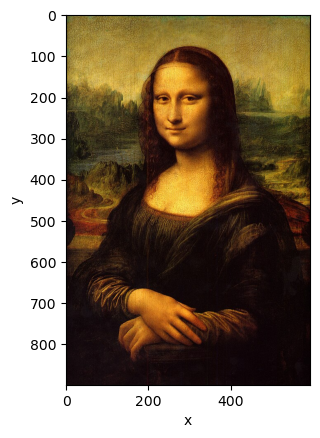

In [15]:
img = plt.imread('Mona_Lisa.jpg')
plt.imshow( img ) # This is the original image
plt.gca().set_xlabel( 'x' )
plt.gca().set_ylabel( 'y' )
print(img.shape)

In [16]:
img_gray = img[:,:,0] * 0.2989 + img[:,:,1] * 0.5870 + img[:,:,2] * 0.1140 #image conversion to grayscale.
# plt.imshow( img_gray )


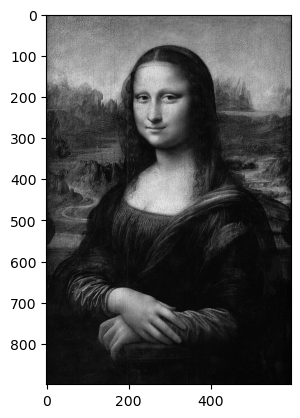

In [17]:
plt.imshow( img_gray, cmap='gray' )

In [18]:
shifts = range(-10, 11)
correlations = []
height, width = img_gray.shape
img_gray.shape

(899, 594)

In [19]:
def shift_image(image, tx):
    shifted_img = np.zeros_like(image)
    if tx > 0:
        shifted_img[:, tx:] = image[:, :-tx]
    elif tx < 0:
        shifted_img[:, :tx] = image[:, -tx:]
    else:
        shifted_img = image
    return shifted_img


In [20]:
for tx in shifts:
    shifted_img = shift_image(img_gray, tx)
    corr = np.corrcoef(img_gray.flatten(), shifted_img.flatten())[0, 1]
    correlations.append(corr)
print(len(correlations))
print(len(shifts))

21
21


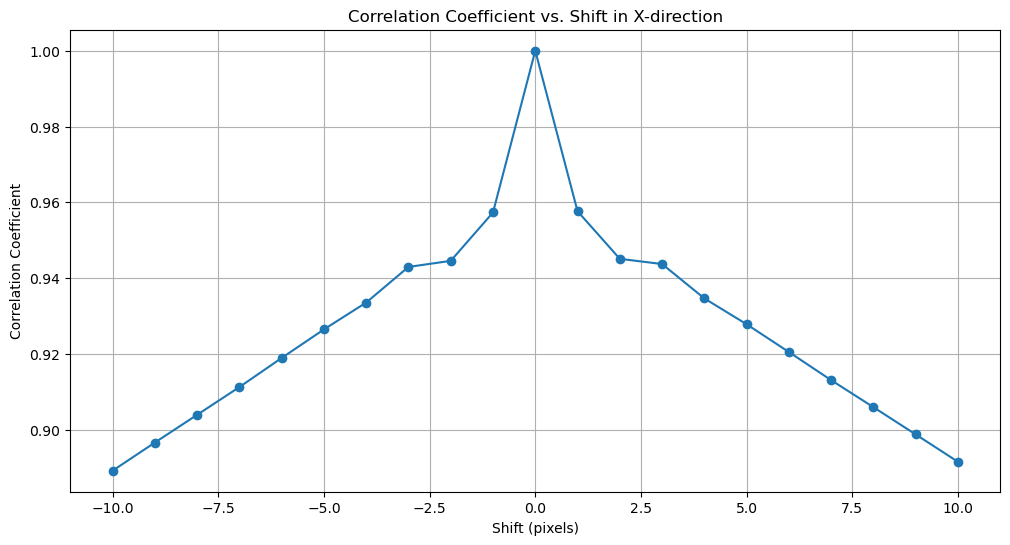

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(shifts, correlations, marker='o')
plt.title('Correlation Coefficient vs. Shift in X-direction')
plt.xlabel('Shift (pixels)')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.show()

In [22]:
def pixelIntensity(image):
    flat_img = image.flatten() #converted to 1 d array
    hist = np.zeros(256)
    for pixel_value in flat_img:
        hist[int(pixel_value )] += 1
    return hist

In [23]:
def compute_normalized_histogram(hist):
    total_pixels = np.sum(hist)
    return hist / total_pixels

In [24]:
bins=16
def lessBins(hist):
    new_hist = np.zeros(int(256/bins))
    for i, count in enumerate(hist):
        new_hist[i // bins] += count  # Integer division to get the correct bin
    return new_hist

    return new_hist

In [25]:
hist = pixelIntensity(img_gray)
new_hist=lessBins(hist)
normalized_hist = compute_normalized_histogram(new_hist)
# normalized_hist_orig=compute_normalized_histogram(hist)

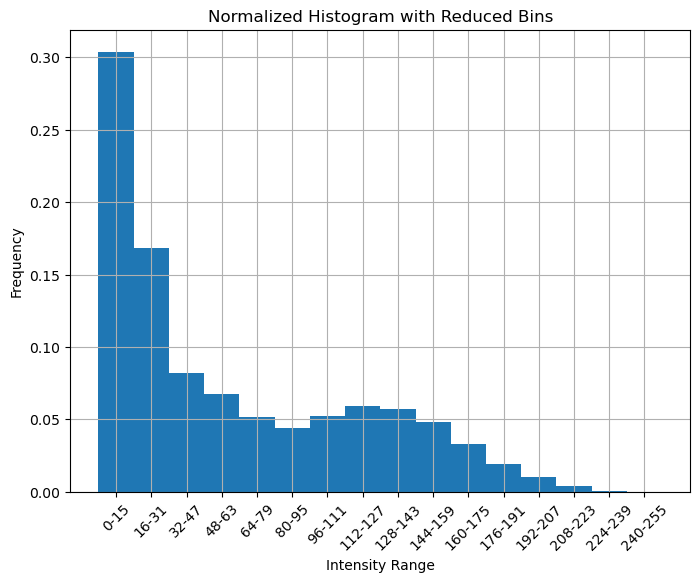

In [26]:
plt.figure(figsize=(8, 6))
plt.bar(range(len(normalized_hist)), normalized_hist, width=1.0)
x_labels = [f'{i * bins}-{(i + 1) * bins - 1}' for i in range(len(new_hist))]
plt.xticks(range(len(normalized_hist)), x_labels, rotation=45)
plt.title('Normalized Histogram with Reduced Bins')
plt.xlabel('Intensity Range')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()